In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# ファイルのパス（マイドライブ配下のフォルダも含めて）
file_path = '/content/drive/MyDrive/data.csv  のコピー'

# 読み込み
# データは著作権の都合で公開していません。
# GitHubにはデータを置いていないため、以下は実行時に各自のローカルに用意してください
df = pd.read_csv("employee_data.csv")


# 確認
df.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023


In [ ]:
# 日本語フォントのインストール（Colab環境の場合）
!apt-get -qq install fonts-ipafont-gothic

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# IPAゴシックのフォントパス
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
font_prop = fm.FontProperties(fname=font_path)

# matplotlibのデフォルトフォントを日本語対応に変更
plt.rcParams['font.family'] = font_prop.get_name()


Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho (00303-21ubuntu1) ...
Setting up fonts-ipafont-mincho (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-mincho/ipam.ttf to provide /usr/share/fonts/truetype/fonts-japanese-mincho.ttf (fonts-japanese-mincho.ttf) in auto mode
Setting up fonts-ipafont-gothic (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-gothic/ipag.ttf to provide /usr/share/fonts/truetype/fonts-japanese-gothic.ttf (fonts-japanese-gothic.ttf) in auto mode
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:30:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


          Model  Accuracy    Recall       AUC
0      Logistic  0.870748  0.291667  0.800898
1  RandomForest  0.863946  0.187500  0.803650
2       XGBoost  0.863946  0.333333  0.820122


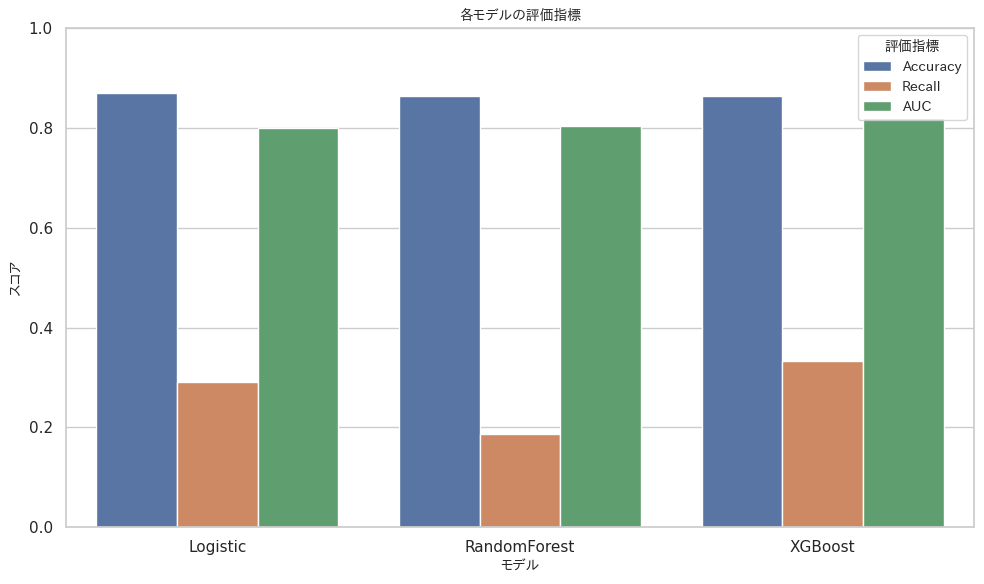

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# データ読み込み
df = pd.read_csv("/content/drive/MyDrive/data.csv  のコピー")

# カテゴリ変数の自動抽出とエンコード
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)



# 目的変数と特徴量
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# データ分割（stratifyを追加）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# モデル定義
models = {
    'Logistic': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 評価記録用リスト
results = []

# 評価
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results.append({"Model": name, "Accuracy": acc, "Recall": recall, "AUC": auc})

# DataFrameにまとめて表示
results_df = pd.DataFrame(results)
print(results_df)

# --- ここまでインポートやモデル評価処理 ---

# 日本語フォント設定
!apt-get -qq install fonts-ipafont-gothic

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 可視化（スライド用）
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("各モデルの評価指標", fontproperties=font_prop)
plt.xlabel("モデル", fontproperties=font_prop)
plt.ylabel("スコア", fontproperties=font_prop)
plt.ylim(0, 1)
plt.legend(title="評価指標", prop=font_prop, title_fontproperties=font_prop)

plt.tight_layout()
plt.savefig("model_comparison.png")  # スライド用画像出力
plt.show()

